# PV: Solar production on south- vs. west-facing rooftop and how solar systems align with 4CP events in Texas

This notebook will explore solar generation around the ERCOT 4CP events and compare West vs South facing solar generation during those events.

The ERCOT 4CP events are the 15-minute ERCOT grid peak events for each month in June, July, August and September.

ERCOT uses each large customer’s (including municipal utilities) total energy demand during the 4CP periods in the previous year as the basis for charges in the current year.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import psycopg2
import sqlalchemy as sqla
import os
from config.read_config import get_database_config
import sys
%matplotlib inline
sys.executable  # shows you your path to the python you're using

'/opt/conda/bin/python'

In [2]:
# read in db credentials from config/config.txt
# * make sure you add those to the config/config.txt file! *

database_config = get_database_config("./config/config.txt")


In [3]:
# get our DB connection
engine = sqla.create_engine('postgresql://{}:{}@{}:{}/{}'.format(database_config['username'],
                                                                     database_config['password'],
                                                                     database_config['hostname'],
                                                                     database_config['port'],
                                                                     database_config['database']
                                                                     ))


In [4]:
# These are the ERCOT 4CP events (start date/time and end date/time) for 2016 - 2019 acquired from
# http://mis.ercot.com/misapp/GetReports.do?reportTypeId=13037&reportTitle=Planned%20Service%20Four%20Coincident%20Peak%20Calculations&showHTMLView=&mimicKey

event_start_dates = ['2019-06-19 17:00:00-05', '2019-07-30 16:30:00-05', '2019-08-12 17:00:00-05', '2019-09-06 16:45:00-05',
               '2018-06-27 17:00:00-05', '2018-07-19 17:00:00-05', '2018-08-23 16:45:00-05', '2018-09-19 16:30:00-05',
               '2017-06-23 16:45:00-05', '2017-07-28 17:00:00-05', '2017-08-16 17:00:00-05', '2017-09-20 16:45:00-05',
               '2016-06-15 17:00:00-05', '2016-07-14 16:00:00-05', '2016-08-11 16:30:00-05', '2016-09-19 16:16:00-05'
              ]
event_end_dates = ['2019-06-19 17:15:00-05', '2019-07-30 16:45:00-05', '2019-08-12 17:15:00-05', '2019-09-06 17:00:00-05',
               '2018-06-27 17:15:00-05', '2018-07-19 17:15:00-05', '2018-08-23 17:00:00-05', '2018-09-19 16:45:00-05',
               '2017-06-23 17:00:00-05', '2017-07-28 17:15:00-05', '2017-08-16 17:15:00-05', '2017-09-20 17:00:00-05',
               '2016-06-15 17:15:00-05', '2016-07-14 16:15:00-05', '2016-08-11 16:45:00-05', '2016-09-19 16:31:00-05']

In [5]:
# Select the dataids, pv direction, amount of PV of solar homes
# we're selecting homes with just South and West facing PV that have data between the first event and the last event


query = """
select dataid, pv, pv_panel_direction, total_amount_of_pv, amount_of_west_facing_pv, amount_of_south_facing_pv
from other_datasets.metadata
where pv is not null
and total_amount_of_pv is not null
and grid is not null 
and solar is not null
and pv_panel_direction in ('South', 'West')
and egauge_1min_min_time < '2016-06-15'
and egauge_1min_max_time > '2019-09-06'
"""

# create a Pandas dataframe with the data from the sql query
df = pd.read_sql_query(sqla.text(query), engine)
df

,dataid,pv,pv_panel_direction,total_amount_of_pv,amount_of_west_facing_pv,amount_of_south_facing_pv
0,7030,yes,South,5.250,0.000,5.250
1,8419,yes,South,4.070,0.000,4.070
2,4357,yes,South,4.000,0.000,4.000
3,3009,yes,South,6.250,NaN,6.250
4,661,yes,South,6.300,NaN,6.300
5,7719,yes,South,6.300,NaN,6.300
6,6691,yes,South,5.200,NaN,5.200
7,7767,yes,South,5.920,0.000,5.920
8,7940,yes,West,5.250,5.250,NaN
9,3649,yes,South,7.540,NaN,7.540


In [6]:
# grab dataids and convert them to a string to put into the SQL query
dataids_list = df['dataid'].tolist()
print("{} dataids selected listed here:".format(len(dataids_list)))
dataids_str = ','.join(list(map(str, dataids_list)))
dataids_str
dataids_list

47 dataids selected listed here:


[7030,
 8419,
 4357,
 3009,
 661,
 7719,
 6691,
 7767,
 7940,
 3649,
 3506,
 5357,
 8086,
 8467,
 7800,
 7741,
 7739,
 5796,
 5738,
 5129,
 2470,
 2449,
 1169,
 187,
 9932,
 6139,
 93,
 5439,
 171,
 5892,
 890,
 6643,
 8626,
 2199,
 9134,
 8767,
 8317,
 8084,
 6836,
 5972,
 4336,
 3482,
 3039,
 2814,
 2461,
 2233,
 744]

In [7]:
# Assemble the SQL query to pull the data for the selected dataids
# 
first_start = event_start_dates.pop(0)
first_end   = event_end_dates.pop(0)
query_2 = """
select dataid, localminute, solar, grid from electricity.eg_realpower_1min 
where ((localminute >= '{}' and localminute <= '{}') """.format(first_start, first_end)

for start, end in zip(event_start_dates, event_end_dates):
    query_2 = query_2 + "OR (localminute >= '{}' and localminute <= '{}') ".format(start, end)

query_2 = query_2 + """ ) AND dataid in ({})""".format(dataids_str)

# here's what that query is
print("sql query is \n" + query_2)

# create a dataframe with the data from the sql query
df2 = pd.read_sql_query(sqla.text(query_2), engine)

# calculate usage as grid minus solar (which is actually grid + solar because solar is negative use)
# Calculate the difference with a lambda function and add it as a new column called 'usage'
df2['usage'] = df2.apply(lambda row: row.solar + row.grid, axis=1)
df2.head(15)

sql query is 

select dataid, localminute, solar, grid from electricity.eg_realpower_1min 
where ((localminute >= '2019-06-19 17:00:00-05' and localminute <= '2019-06-19 17:15:00-05') OR (localminute >= '2019-07-30 16:30:00-05' and localminute <= '2019-07-30 16:45:00-05') OR (localminute >= '2019-08-12 17:00:00-05' and localminute <= '2019-08-12 17:15:00-05') OR (localminute >= '2019-09-06 16:45:00-05' and localminute <= '2019-09-06 17:00:00-05') OR (localminute >= '2018-06-27 17:00:00-05' and localminute <= '2018-06-27 17:15:00-05') OR (localminute >= '2018-07-19 17:00:00-05' and localminute <= '2018-07-19 17:15:00-05') OR (localminute >= '2018-08-23 16:45:00-05' and localminute <= '2018-08-23 17:00:00-05') OR (localminute >= '2018-09-19 16:30:00-05' and localminute <= '2018-09-19 16:45:00-05') OR (localminute >= '2017-06-23 16:45:00-05' and localminute <= '2017-06-23 17:00:00-05') OR (localminute >= '2017-07-28 17:00:00-05' and localminute <= '2017-07-28 17:15:00-05') OR (localminute

,dataid,localminute,solar,grid,usage
0,5439,2016-06-15 22:00:00+00:00,1.542,1.230,2.772
1,5439,2016-06-15 22:01:00+00:00,1.532,1.245,2.777
2,5439,2016-06-15 22:02:00+00:00,1.524,1.263,2.787
3,5439,2016-06-15 22:03:00+00:00,1.503,1.288,2.791
4,5439,2016-06-15 22:04:00+00:00,1.492,1.209,2.701
5,5439,2016-06-15 22:05:00+00:00,1.497,1.179,2.676
6,5439,2016-06-15 22:06:00+00:00,1.486,1.179,2.665
7,5439,2016-06-15 22:07:00+00:00,1.474,1.194,2.668
8,5439,2016-06-15 22:08:00+00:00,1.464,1.206,2.670
9,5439,2016-06-15 22:09:00+00:00,1.449,-0.054,1.395


In [8]:
# Total number of records in the dataset
df2['dataid'].count()

11312

In [9]:
# Checking completeness of data. We will consider only those homes that have 100% data for the 4CP dates
data = df2.groupby(['dataid']).size().reset_index(name='counts')
data['perc'] = (data['counts']/256)*100
ndata = data[data['perc'] == 100]
final_dataids = ndata['dataid']

df3=df2.loc[df2['dataid'].isin(final_dataids)]
df3.count()


dataid         8704
localminute    8704
solar          8704
grid           8704
usage          8704
dtype: int64

In [10]:
# drop any missing values
df3 = df3.dropna()

In [11]:
# convert localminute to pandas datetime type
df3['datetime'] = pd.to_datetime(df3['localminute'])

# and set as index
df3 = df3.set_index('datetime')
df3

,dataid,localminute,solar,grid,usage
datetime,,,,,
2016-06-15 22:00:00+00:00,5439,2016-06-15 22:00:00+00:00,1.542,1.230,2.772
2016-06-15 22:01:00+00:00,5439,2016-06-15 22:01:00+00:00,1.532,1.245,2.777
2016-06-15 22:02:00+00:00,5439,2016-06-15 22:02:00+00:00,1.524,1.263,2.787
2016-06-15 22:03:00+00:00,5439,2016-06-15 22:03:00+00:00,1.503,1.288,2.791
2016-06-15 22:04:00+00:00,5439,2016-06-15 22:04:00+00:00,1.492,1.209,2.701
...,...,...,...,...,...
2019-09-06 22:00:00+00:00,6691,2019-09-06 22:00:00+00:00,0.442,4.866,5.308
2019-09-06 22:00:00+00:00,2814,2019-09-06 22:00:00+00:00,3.325,-2.698,0.627
2019-09-06 22:00:00+00:00,8317,2019-09-06 22:00:00+00:00,0.831,1.612,2.443


In [12]:
# group by month and dataid and take the mean of solar, grid, and usage within those groups
grouped = df3.groupby([pd.Grouper(freq='M'), 'dataid']).mean()
grouped

solar      grid     usage
datetime                  dataid                              
2016-06-30 00:00:00+00:00 171     3.855063 -1.513812  2.341250
                          187     3.410312  1.176313  4.586625
                          661     2.378437  0.980875  3.359312
                          744     1.639937  2.335188  3.975125
                          1169    1.522562 -0.330250  1.192312
...                                    ...       ...       ...
2019-09-30 00:00:00+00:00 8467    1.881750  2.426375  4.308125
                          8626    2.335375  1.441000  3.776375
                          8767    0.872938  2.884812  3.757750
                          9134    1.860437  2.303187  4.163625
                          9932    1.233563 -0.749250  0.484312

[544 rows x 3 columns]

In [13]:
# map pv direction onto dataids with a merge after resetting the index
grouped = grouped.reset_index()
grouped = grouped.merge(df, how='left', left_on='dataid', right_on='dataid')
grouped

,datetime,dataid,solar,grid,usage,pv,pv_panel_direction,total_amount_of_pv,amount_of_west_facing_pv,amount_of_south_facing_pv
0,2016-06-30 00:00:00+00:00,171,3.855063,-1.513812,2.341250,yes,West,6.250,6.25,NaN
1,2016-06-30 00:00:00+00:00,187,3.410312,1.176313,4.586625,yes,West,5.250,5.25,NaN
2,2016-06-30 00:00:00+00:00,661,2.378437,0.980875,3.359312,yes,South,6.300,NaN,6.300
3,2016-06-30 00:00:00+00:00,744,1.639937,2.335188,3.975125,yes,South,5.920,0.00,5.920
4,2016-06-30 00:00:00+00:00,1169,1.522562,-0.330250,1.192312,yes,South,3.885,0.00,3.885
...,...,...,...,...,...,...,...,...,...,...
539,2019-09-30 00:00:00+00:00,8467,1.881750,2.426375,4.308125,yes,South,5.180,0.00,5.180
540,2019-09-30 00:00:00+00:00,8626,2.335375,1.441000,3.776375,yes,South,6.615,0.00,6.615
541,2019-09-30 00:00:00+00:00,8767,0.872938,2.884812,3.757750,yes,South,4.070,NaN,4.070
542,2019-09-30 00:00:00+00:00,9134,1.860437,2.303187,4.163625,yes,South,4.995,NaN,4.995


In [14]:
# reindex by the date
grouped = grouped.set_index('datetime')
grouped

,dataid,solar,grid,usage,pv,pv_panel_direction,total_amount_of_pv,amount_of_west_facing_pv,amount_of_south_facing_pv
datetime,,,,,,,,,
2016-06-30 00:00:00+00:00,171,3.855063,-1.513812,2.341250,yes,West,6.250,6.25,NaN
2016-06-30 00:00:00+00:00,187,3.410312,1.176313,4.586625,yes,West,5.250,5.25,NaN
2016-06-30 00:00:00+00:00,661,2.378437,0.980875,3.359312,yes,South,6.300,NaN,6.300
2016-06-30 00:00:00+00:00,744,1.639937,2.335188,3.975125,yes,South,5.920,0.00,5.920
2016-06-30 00:00:00+00:00,1169,1.522562,-0.330250,1.192312,yes,South,3.885,0.00,3.885
...,...,...,...,...,...,...,...,...,...
2019-09-30 00:00:00+00:00,8467,1.881750,2.426375,4.308125,yes,South,5.180,0.00,5.180
2019-09-30 00:00:00+00:00,8626,2.335375,1.441000,3.776375,yes,South,6.615,0.00,6.615
2019-09-30 00:00:00+00:00,8767,0.872938,2.884812,3.757750,yes,South,4.070,NaN,4.070


In [15]:
# regroup by year and pv_panel_direction and average the values
year_west_vs_south = (grouped.groupby([pd.Grouper(freq='Y'),'pv_panel_direction']).mean())

# we don't need a mean of the dataids, so we can drop that column now
year_west_vs_south = year_west_vs_south.drop(columns=['dataid'])
year_west_vs_south

solar      grid     usage  \
datetime                  pv_panel_direction                                 
2016-12-31 00:00:00+00:00 South               2.303710  0.480402  2.784112   
                          West                3.934009 -0.531898  3.402111   
2017-12-31 00:00:00+00:00 South               1.819437  1.227527  3.046964   
                          West                3.550970 -0.475082  3.075889   
2018-12-31 00:00:00+00:00 South               1.748673  0.603485  2.352157   
                          West                3.325595 -0.249917  3.075679   
2019-12-31 00:00:00+00:00 South               1.774207  0.779849  2.554056   
                          West                3.391934  0.157493  3.549427   

                                              total_amount_of_pv  \
datetime                  pv_panel_direction                       
2016-12-31 00:00:00+00:00 South                         5.399200   
                          West                          6.799444   
2017-12-31 00:00:00+00:00 South                         5.399200   
                          West                          6.799444   
2018-12-31 00:00:00+00:00 South                         5.399200   
                          West                          6.799444   
2019-12-31 00:00:00+00:00 South                         5.399200   
                          West                          6.799444   

                                              amount_of_west_facing_pv  \
datetime                  pv_panel_direction                             
2016-12-31 00:00:00+00:00 South                               0.000000   
                          West                                6.799444   
2017-12-31 00:00:00+00:00 South                               0.000000   
                          West                                6.799444   
2018-12-31 00:00:00+00:00 South                               0.000000   
                          West                                6.799444   
2019-12-31 00:00:00+00:00 South                               0.000000   
                          West                                6.799444   

                                              amount_of_south_facing_pv  
datetime                  pv_panel_direction                             
2016-12-31 00:00:00+00:00 South                                  5.3992  
                          West                                   0.0000  
2017-12-31 00:00:00+00:00 South                                  5.3992  
                          West                                   0.0000  
2018-12-31 00:00:00+00:00 South                                  5.3992  
                          West                                   0.0000  
2019-12-31 00:00:00+00:00 South                                  5.3992  
                          West                                   0.0000

In [16]:
# now just drop unneeded columns and rearrange them and simplify the view
year_west_vs_south = year_west_vs_south.reset_index()
year_west_vs_south['year'] = pd.DatetimeIndex(year_west_vs_south['datetime']).year
year_west_vs_south = year_west_vs_south[['year', 'pv_panel_direction','solar', 'grid', 'usage']]
year_west_vs_south = year_west_vs_south.set_index('year')
year_west_vs_south

,pv_panel_direction,solar,grid,usage
year,,,,
2016,South,2.303710,0.480402,2.784112
2016,West,3.934009,-0.531898,3.402111
2017,South,1.819437,1.227527,3.046964
2017,West,3.550970,-0.475082,3.075889
2018,South,1.748673,0.603485,2.352157
2018,West,3.325595,-0.249917,3.075679
2019,South,1.774207,0.779849,2.554056
2019,West,3.391934,0.157493,3.549427


# Result: West Facing Solar Wins!
## Despite the higher in-home usage (green bars, 'usage') in the west facing houses the solar production is so high (blue bars, 'solar') that it is still using less power from the grid (orage bars, 'grid') in West-facing vs South-facing home in each paired year. In most cases here, grid is even negative meaning that the West-facing homes are putting power back on the grid.

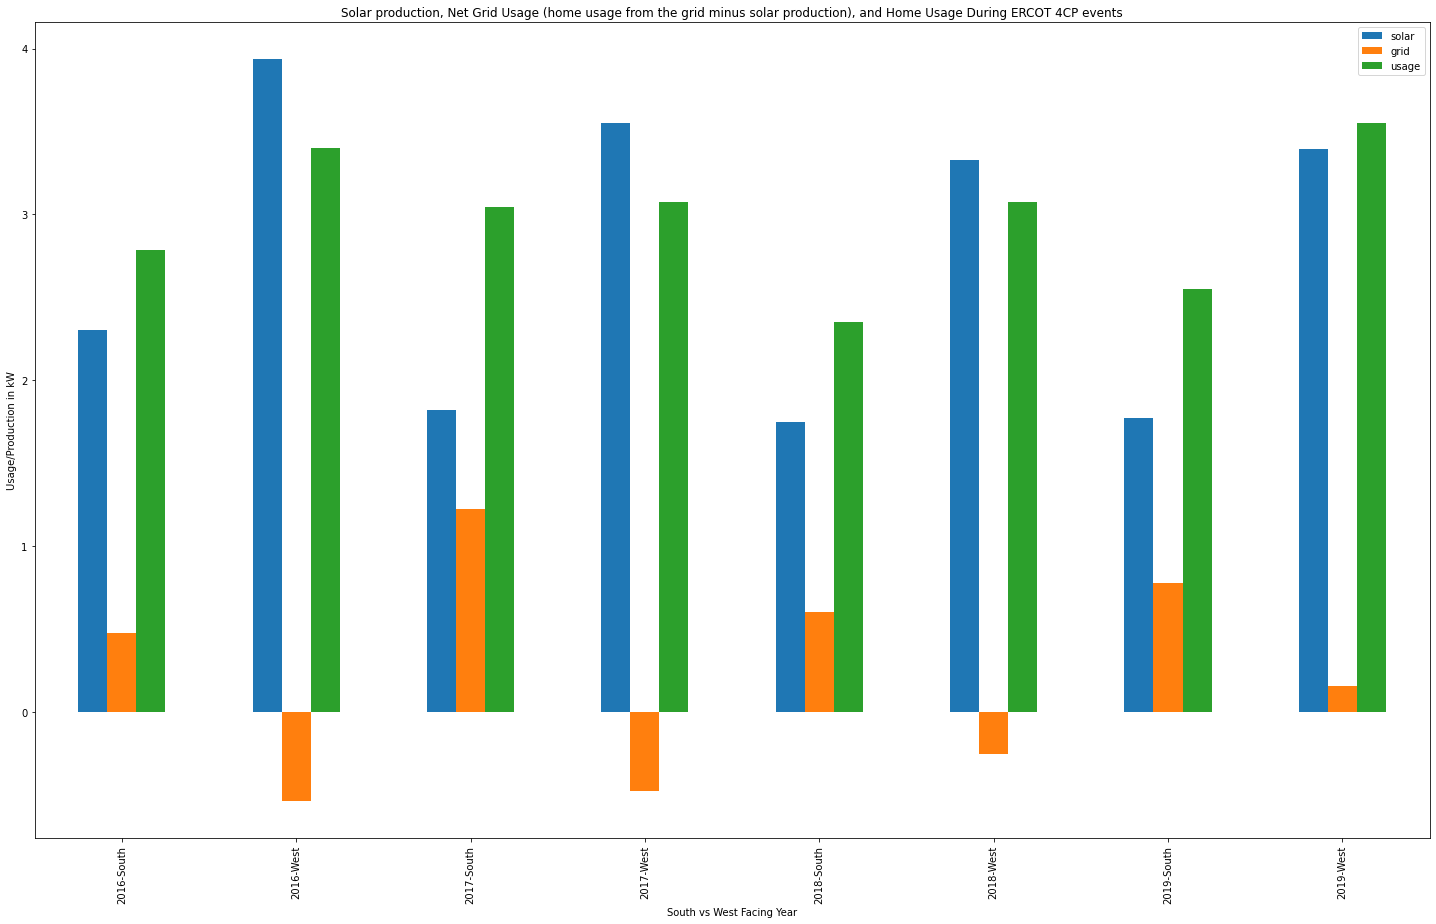

In [17]:
from matplotlib.pyplot import figure
plot = year_west_vs_south.plot(kind='bar',figsize=(25,15), title="Solar production, Net Grid Usage (home usage from the grid minus solar production), and Home Usage During ERCOT 4CP events")
labels = plot.set_xticklabels(['2016-South', '2016-West', '2017-South', '2017-West', '2018-South', '2018-West', '2019-South', '2019-West'])
ylabel = plot.set_ylabel('Usage/Production in kW')
xlabel = plot.set_xlabel('South vs West Facing Year')